# CSE/ISE 337 Assignment 4
**Due date: 23:59 on Dec 12, 2024**

## Google Colab Tutorial
---
Go to https://colab.research.google.com/notebooks/, you will see a tutorial named "Welcome to Colaboratory" file, where you can learn the basics of using google colab.

Settings used for assignments: ***Edit -> Notebook Settings -> Runtime Type (Python 3)***.


## Description
---
This assignment contains two parts.  
```
Problem 1 - Linear regression model for a fish market(50 points)
          You will create a linear regression model for data about a fish market.
          You can use the code from the class lectures on Pandas and Linear Regression,
          especially to clean the data and identify the correlations.
Problem 2 - Neural Network for a car market(50 points)
          You will create a Neural Network using Pytorch for data about a car market.
          You can use much of the code from the class lecture on PyTorch.
          For this problem, you need to understand and study the model covered in the class.
```







# Problem 1 [50] :
This exercise will guide you through the process of creating a linear regression model for data about a fish market.  You can use the code from the class lectures on Pandas and Linear Regression, especially to clean the data and identify the correlations.

Please **KEEP** the output of each cell before submission, we will grade mainly based on them; otherwise, the grading process could be delayed.

## Mount google drive to the project

`gdrive/MyDrive/` is like a root directory of the google colab machine. Let's change the current working directory of google colab to the directory of assignment 4. This step is optional for student working in a local machine.

In [1]:
from google.colab import drive
drive.mount('/gdrive')

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
HW4_ROOT_PATH = '/gdrive/MyDrive/' + 'PATH/TO/ASSIGNMENT4'   # TODO: Replace PATH/TO/ASSIGNMENT4, {last name}_{first name}_{sbu id}_hw4 for example
%cd -q $HW4_ROOT_PATH
%ls
# At least, there should be Fish.csv, cars.csv, Problem1.ipynb and Problem2.ipynb in your root path.

carbody_model.pt  Fish.csv     info.txt        Problem2.ipynb
cars.csv          HW5_ML.docx  Problem1.ipynb  Solutions/


## Import Packages

Following packages are what we will use throughout this exercise. Please do not use other packages.

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## Observe Raw Data [5]
Let's look into what our raw data looks like. Open `Fish.csv` as dataframe and printout its head.


In [2]:
####################
#### TODO: Load DataFrame and printout its head
Fish =pd.read_csv("Fish.csv")
print(Fish.head())
####################

  Species  Weight  Length1  Length2  Length3   Height   Width
0   Bream   242.0     23.2     25.4     30.0  11.5200  4.0200
1   Bream   290.0     24.0     26.3     31.2  12.4800  4.3056
2   Bream   340.0     23.9     26.5     31.1  12.3778  4.6961
3   Bream   363.0     26.3     29.0     33.5  12.7300  4.4555
4   Bream   430.0     26.5     29.0     34.0  12.4440  5.1340


## Clean the Raw Data [5]

The following features, `Length1`, `Length2`, and `Length3` are ambiguous. `info.txt` file provides insight as to what they are. Rename the `Length1` column to `VerticalLength`, `Length2` to `DiagonalLength`, and `Length3` to `CrossLength`.

In [3]:
####################
# TODO: Rename the Length columns so they're more descriptive
Fish.rename(columns ={"Length1":"VerticalLength", "Length2":"DiagonalLength","Length3":"CrossLength"}, inplace=True)
print(Fish.head())
####################

  Species  Weight  VerticalLength  DiagonalLength  CrossLength   Height  \
0   Bream   242.0            23.2            25.4         30.0  11.5200   
1   Bream   290.0            24.0            26.3         31.2  12.4800   
2   Bream   340.0            23.9            26.5         31.1  12.3778   
3   Bream   363.0            26.3            29.0         33.5  12.7300   
4   Bream   430.0            26.5            29.0         34.0  12.4440   

    Width  
0  4.0200  
1  4.3056  
2  4.6961  
3  4.4555  
4  5.1340  


## Identify a Correlation [5]

Use the [`corr()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html) method to look at the correlation data for the Weight column.

Then, create a heatmap for the correlation data to identify three most informative variables. What are the three features? Write your answers below

* Feature 1: Cross Length
* Feature 2: Vertical Length
* Feature 3: Diagonal Length

Weight            1.000000
VerticalLength    0.915712
DiagonalLength    0.918618
CrossLength       0.923044
Height            0.724345
Width             0.886507
Name: Weight, dtype: float64


<Axes: >

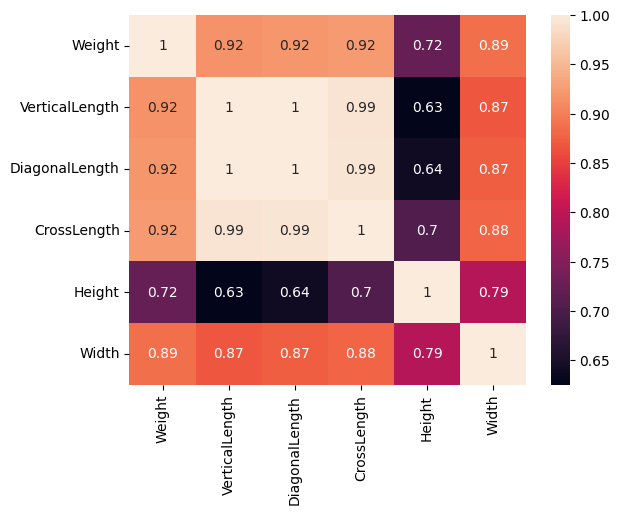

In [4]:
####################
#### TODO: get the correlation data for the Weight column
correlation=Fish.corr(numeric_only=True)
print(correlation["Weight"])
sns.heatmap(correlation,annot=True)
####################

## Regression Dataset for Bream [10]

Before we try to learn a model that predicts the weight of a fish type bream,
let's filter the DataFrame so that it only contains the values for the Bream species and assigns the resulting DataFrame to a variable named `bream`.


In [5]:
####################
#### TODO: filter the data so it only contains the values for the Bream species
bream = Fish[Fish["Species"] == "Bream"]
####################


print(bream.head())

  Species  Weight  VerticalLength  DiagonalLength  CrossLength   Height  \
0   Bream   242.0            23.2            25.4         30.0  11.5200   
1   Bream   290.0            24.0            26.3         31.2  12.4800   
2   Bream   340.0            23.9            26.5         31.1  12.3778   
3   Bream   363.0            26.3            29.0         33.5  12.7300   
4   Bream   430.0            26.5            29.0         34.0  12.4440   

    Width  
0  4.0200  
1  4.3056  
2  4.6961  
3  4.4555  
4  5.1340  


Then, we will splilt the bream species DataFrame into train and test sets. The size of the test set should be 20% of the entire dataset.

Remember, we are predicting weight of the bream species given other features.


In [6]:
####################
#### TODO: split the training and test data
X=bream[bream.columns[2:]]
y=bream["Weight"]

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,test_size=0.2,random_state=20)

####################
X_train, X_test, y_train, y_test

(    VerticalLength  DiagonalLength  CrossLength   Height   Width
 27            32.7            36.0         41.5  16.5170  5.8515
 3             26.3            29.0         33.5  12.7300  4.4555
 33            37.4            41.0         45.9  18.6354  6.7473
 17            30.4            33.0         38.5  14.9380  5.1975
 24            31.9            35.0         40.5  16.2405  5.5890
 14            29.4            32.0         37.2  14.9544  5.1708
 25            31.8            35.0         40.9  16.3600  6.0532
 5             26.8            29.7         34.7  13.6024  4.9274
 29            33.5            37.0         42.6  18.9570  6.6030
 32            36.2            39.5         45.3  18.7542  6.7497
 18            30.9            33.5         38.6  15.6330  5.1338
 6             26.8            29.7         34.5  14.1795  5.2785
 16            30.4            33.0         38.3  14.8604  5.2854
 19            31.0            33.5         38.7  14.4738  5.7276
 8        

## Train and Evaluate Model [10]

Now we are ready to train our model. We will train what we call *linear regression* model. You could implement this your own, but we will use `LinearRegression` from sklearn.

In the cell below, let's train the model on training set and evaluate it on the test set.

In [7]:
####################
#### TODO: create the model and fit the training data

lm=LinearRegression()

lm.fit(X_train,y_train)
####################
####################
#### TODO: score the testing data
SSR =sum([(i-j)**2 for i,j in zip(lm.predict(X_test),y_test)])
mean = sum(y_test)/(len(y_test))
SSE =sum([(i-mean)**2 for i in y_test])
score = 1-SSR/SSE
####################
print(f"R-squared score: {score}")

R-squared score: 0.7222802669477268


## Make Prediction [10]

With the trained model, let's make prediction on our dataset. We want to see how our model generalize to other data and other types of fish as well, so make prediction on every fish in `Fish.csv`.

Then, join the predicted data, whose column is named `Predicted Weight`, with the actual data and assign the resulting DataFrame to a variable named `final`.

In [8]:
####################
#### TODO: make the predictions
all=Fish[Fish.columns[2:]]
Prediction = lm.predict(all)

####################

In [12]:
####################
#### TODO: join the column and set variable named final
final =Fish.copy()
final["Predicted Weight"] = Prediction
Fish.head(10)

####################
print(final.head())

  Species  Weight  VerticalLength  DiagonalLength  CrossLength   Height  \
0   Bream   242.0            23.2            25.4         30.0  11.5200   
1   Bream   290.0            24.0            26.3         31.2  12.4800   
2   Bream   340.0            23.9            26.5         31.1  12.3778   
3   Bream   363.0            26.3            29.0         33.5  12.7300   
4   Bream   430.0            26.5            29.0         34.0  12.4440   

    Width  Predicted Weight  
0  4.0200        230.438010  
1  4.3056        313.099727  
2  4.6961        327.317720  
3  4.4555        368.511968  
4  5.1340        397.900954  


## Plot the Residuals [5]

To visualize how good our prediction is in comparison to the actual data, we need to plot residuals.

Calculate the residuals and use the [`displot()`](https://seaborn.pydata.org/generated/seaborn.displot.html) method to create a displacement plot that plots the residuals.

/home/carl/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


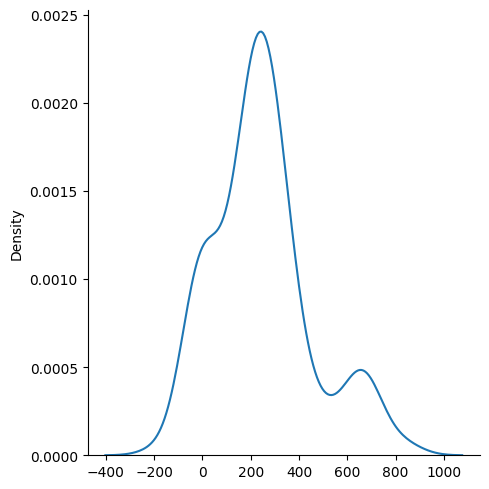

In [17]:
####################
#### TODO: calculate the residuals and plot the displacement.
residuals = [i-j for i,j in zip(final["Weight"],final["Predicted Weight"])]
sns.displot(residuals, kind="kde")
####################

## Submission guidelines
---
Plagiarism: plagiarism is strictly forbidden.   
Note: Please be advised that uploading your homework assignments to public platforms, such as GitHub, is strictly prohibited. Sharing your homework solutions in this manner (even after the course completion) constitutes a violation of academic integrity and will be treated as such.


### Overall submission

Before preparing the **{last name}\_{first name}\_{sbu id}_hw4.zip** for the BrightSpace submision, you will need to create ***drive_url.txt*** and put it in your zip file. This file will contain the Google drive URL `https://drive.google.com/drive/folders/FOLDER_ID?usp=drive_link` for the root working directory. You can create it by **right-clicking** the root working folder and select **share->share**.
Permit the grading TAs to access the folder (as an **editor**): **suychen@cs.stonybrook.edu** and **yoosjang@cs.stonybrook.edu**. Note: Please **uncheck** the "**notify people**" box.

Note: datasets or learned weights should not be a part of brightspace submission.  

This zip file should include the below mentioned files in the same folder structure:
```
{last name}_{first name}_{sbu id}_hw4/
├── Problem1.ipynb
├── Problem2.ipynb
└── drive_url.txt
```


Other Notes:  
Colab has a good feature of version control, you should take advantage of this to save your work properly. However, the timestamp of the submission made in brightspace is the only one that we consider for grading. To be more specific, we will only grade the version of your code right before the timestamp of the submission made in brightspace.

You are encouraged to post questions on Piazza and come by TAs' office hours. Based on the amount of emails that we have received in past years, there might be delays in replying to personal emails. Please ask questions on Piazza and send emails only for personal issues.

**Late submission penalty:** <br>
There will be a 25% penalty for one day of delay, 50% penalty for two days of delay, and a 100% penalty for three or more days of delay. If you submit the homework one minute after the deadline, one late day will be counted, and the 25% penaly will be imposed.